# Exploration Notebook

## Specify Data Source

In [1]:
from config import *

In [2]:
dataset_path = DATA_PATH

NameError: name 'DATA_PATH' is not defined

In [ ]:
hungry = dataset_path + 'hungry'

In [ ]:
hungry

## Load Data

### Check Contents of Data Sub Folders

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import IPython.display as ipd

In [ ]:

audio_files = os.listdir(hungry)
print('Number of audio files in hungry folder: ', len(audio_files))

In [ ]:
burping = dataset_path + 'burping'
audio_files = os.listdir(burping)
print('Number of audio files in burping folder: ', len(audio_files))

In [ ]:
discomfort = dataset_path + 'discomfort'
audio_files = os.listdir(discomfort)
print('Number of audio files in discomfort folder: ', len(audio_files))

In [ ]:
tired = dataset_path + 'tired'
audio_files = os.listdir(tired)
print('Number of audio files in tired folder: ', len(audio_files))

In [ ]:
belly_pain = dataset_path + 'belly_pain'
audio_files = os.listdir(belly_pain)
print('Number of audio files in belly_pain folder: ', len(audio_files))

### Load in an Audio Sample to Visualise

#### Load audio file

In [ ]:
audio_file = hungry + HUNGRY_TEST_SAMPLE
audio_data, sample_rate = librosa.load(audio_file, sr=None)

In [ ]:
print('Audio data: ', audio_data)
print('Sampling rate: ', sample_rate)
print('Audio duration: ', len(audio_data)/sample_rate, 'seconds')


#### Visualise Audio Waveform

In [ ]:
plt.plot(audio_data)
plt.title('Female 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Spectrogram to visualise Frequency Content Over Time

In [ ]:
X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Female 0 - 4 (hungry)')
plt.show()


### Compare Two Waveforms from Same Category to Observe Similarities

#### Load Audio File From Same Sub Folder

In [ ]:
audio_file2 = hungry + '/0D1AD73E-4C5E-45F3-85C4-9A3CB71E8856-1430742197-1.0-m-04-hu.wav'
y2, sample_rate2 = librosa.load(audio_file, sr=None)

##### Extract MFCCs for Both Audio Files

In [ ]:
mfccs1 = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sample_rate2, n_mfcc=13)

#### Compute cosine similarity and compute Average Similarity

In [ ]:
similarity_matrix = cosine_similarity(mfccs1.T, mfccs2.T)
average_similarity = similarity_matrix.mean()

In [ ]:
print("Average Cosine Similarity:", average_similarity)
# An average cosine similarity close to 1 means that the two audio files are similar

In [ ]:
plt.plot(y2)
plt.title('Male 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
X = librosa.stft(y2)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate2, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Male 0 - 4 (hungry)')
plt.show()

#### Compare a Hungry cry to a Burping cry

In [ ]:
burping = dataset_path + 'burping'
audio_file3 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
y3, sample_rate3 = librosa.load(audio_file3, sr=None)


In [ ]:
mfccs3 = librosa.feature.mfcc(y=y3, sr=sample_rate3, n_mfcc=13)

In [ ]:
similarity_matrix = cosine_similarity(mfccs1.T, mfccs3.T)
average_similarity2 = similarity_matrix.mean()

In [ ]:
print("Average Cosine Similarity:", average_similarity2)
# An average cosine similarity close to 1 means that the two audio files are similar (in this case, they are not)

In [ ]:
print(sample_rate, sample_rate2, sample_rate3)

In [ ]:

audio_file4 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
original_audio, original_sr = librosa.load(audio_file4, sr=None)

# Upsample the audio to the desired sampling rate
target_sr = 44100  # Example: desired sampling rate
resampled_audio = librosa.resample(original_audio, orig_sr=original_sr, target_sr=target_sr)


In [ ]:
# Extract MFCCs from the resampled audio
# https://medium.com/@tanveer9812/mfccs-made-easy-7ef383006040
mfccs = librosa.feature.mfcc(y=resampled_audio, sr=target_sr, n_mfcc=13)

# Visualize the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs after Resampling')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time')
plt.show()


## Data Augmentation Technique Exploration
* Noise injection
* Time Shift
* Pitch Shift
* Time Compress
* Time Stretch

In [ ]:
# before augmentation
plt.figure(figsize=(4, 3))
plt.plot(audio_data)
plt.title('Male 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# play the original audio
ipd.Audio(audio_data, rate=sample_rate)

### Noise Injection Example ###

* https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

In [ ]:
import numpy as np

def inject_noise(audio_data, noise_factor):
    noise = np.random.randn(len(audio_data))
    augmented_data = audio_data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(audio_data[0]))
    return augmented_data

In [ ]:
augmented_data_noise = inject_noise(audio_data, 0.015)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(augmented_data_noise)
plt.title('Male 0 - 4 (hungry) - Inject Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# play the augmented audio
ipd.Audio(augmented_data_noise, rate=sample_rate)

### Time Shift Example

In [ ]:
def shift_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [ ]:
augemented_data_time_shifted = shift_time(audio_data, sample_rate, 0.5, 'right')

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(augemented_data_time_shifted)
plt.title('Male 0 - 4 (hungry) - Data Shifted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# play the augmented audio
import IPython.display as ipd
ipd.Audio(augemented_data_time_shifted, rate=sample_rate)


### Pitch Shift Example

In [ ]:
from librosa.effects import pitch_shift

In [ ]:
shift_pitched_data = pitch_shift(audio_data, sr=sample_rate, n_steps=2)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(shift_pitched_data)
plt.title('Male 0 - 4 (hungry) - Pitch Shifted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# play the augmented audio
ipd.Audio(shift_pitched_data, rate=sample_rate)

### Time Stretch Example

In [ ]:
time_stretched_data = librosa.effects.time_stretch(audio_data, rate=0.8)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(time_stretched_data)
plt.title('Male 0 - 4 (hungry) - Time Stretched')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# play the augmented audio
ipd.Audio(time_stretched_data, rate=sample_rate)

### Time Compression Example

In [ ]:
time_compress_data = librosa.mu_compress(audio_data, mu=63)

In [ ]:
time_compress_data2 = librosa.effects.time_stretch(audio_data, rate=1.2)

In [ ]:
len(time_compress_data2)

In [ ]:
len(audio_data)

In [ ]:
len(time_compress_data)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(time_compress_data)
plt.title('Male 0 - 4 (hungry) - Time Compressed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
ipd.Audio(time_compress_data, rate=sample_rate)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(time_compress_data2)
plt.title('Male 0 - 4 (hungry) - Time Compressed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
ipd.Audio(time_compress_data2, rate=sample_rate)

#### Stretching using AudioStretchy

In [ ]:
import audiostretchy
from audiostretchy.stretch import stretch_audio

stretch_audio(audio_file, "output.wav", ratio=1.1)

In [ ]:
aud_stretch, sr = librosa.load("output.wav", sr=None)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(aud_stretch)
plt.title('Male 0 - 4 (hungry) - Audio Stretched')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# New Dataset

In [8]:
import os
root_data = '../data/processed/test/Actor_01/'

# show every file in the directory
for root, dirs, files in os.walk(root_data):
    for file in files:
        print(file)

03-01-02-01-02-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-02-02-01-01.wav
03-01-04-01-01-01-01.wav
03-01-05-01-01-01-01.wav
03-01-06-01-02-01-01.wav
03-01-06-02-02-01-01.wav
03-01-07-02-02-02-01.wav
03-01-08-02-02-02-01.wav


In [9]:
# load datq from file
audio_data, sample_rate = librosa.load(root_data + '03-01-02-01-02-02-01.wav', sr=None)

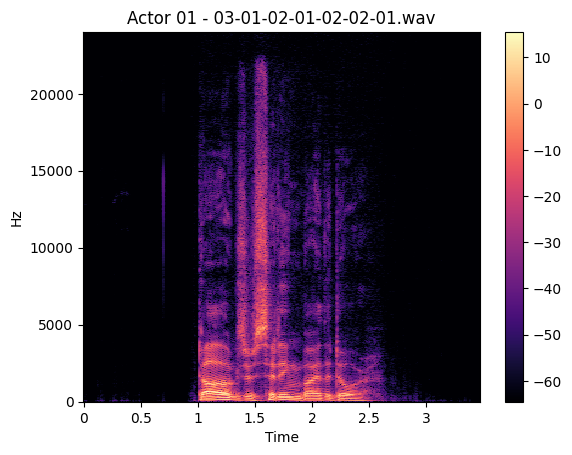

In [10]:
import librosa

X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Actor 01 - 03-01-02-01-02-02-01.wav')
plt.show()

In [11]:
root_data = '../data/processed/'

In [13]:
import os

root_data = '../data/processed/'

total_train = sum(len(files) for _, _, files in os.walk(root_data + 'train/'))
total_val = sum(len(files) for _, _, files in os.walk(root_data + 'val/'))
total_test = sum(len(files) for _, _, files in os.walk(root_data + 'test/'))

total_data = total_train + total_val + total_test

print('Total data: ', total_data)
print('Training data: ', total_train)
print('Validation data: ', total_val)
print('Testing data: ', total_test)


Total data:  4776
Training data:  3993
Validation data:  360
Testing data:  423


In [4]:
!pip install tensorflow
!pip install tensorflow_hub

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load VGGish model from TensorFlow Hub
vggish_model_url = "https://tfhub.dev/google/vggish/1"
vggish_model = hub.load(vggish_model_url)

# Create a placeholder example (can be random)
example = np.random.rand(96, 64)  # Example shape: (time_frames, num_mel_bins)

# Reshape the example to match the expected input shape of VGGish
example = np.expand_dims(example, axis=0)  # Add batch dimension

# Convert the example to a TensorFlow constant tensor
example_tensor = tf.constant(example, dtype=tf.float32)

# Extract features using the VGGish model
embedding_tensor = vggish_model.signatures['embedding']
embeddings = embedding_tensor(example_tensor)

# Print the extracted features
print("Extracted features shape:", embeddings['embedding'].shape)


ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import os
import shutil

In [4]:
import config

source_dir = config.ROOT_DIR_PATH
destination_dir = os.path.join(source_dir, "waveforms")



In [5]:
os.makedirs(destination_dir, exist_ok=True)

In [7]:
for root, _, filenames in os.walk(source_dir):
    for filename in filenames:
        if filename.endswith(".wav"):
            # Construct the source file path
            source_file = os.path.join(root, filename)
            
            # Move the file to the destination directory
            shutil.move(source_file, destination_dir)

Error: Destination path '../data/raw/waveforms\03-01-01-01-01-01-01.wav' already exists

In [9]:
for root, dirs, _ in os.walk(source_dir, topdown=False):
    for dir_name in dirs:
        # Check if the directory name starts with "Actor"
        if dir_name.startswith("Actor"):
            # Construct the path to the directory to be deleted
            dir_to_delete = os.path.join(root, dir_name)
            # Delete the directory
            shutil.rmtree(dir_to_delete)

print("Directories starting with 'Actor' deleted successfully.")

Directories starting with 'Actor' deleted successfully.
